# Investigate a Dataset - TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> **Dataset Description**: 
The dataset will be used for this analysis was collected from TMDb movie database from the year 1965 to 2015. The dataset consist of 10866 row and 21 columns. 


## Analysis Questions
- How budget affect revenue?

- The director produces the highest movies?

- What is the Revenue Trend analysis by Year?

- How genres affected profit and revenue

- Which genres has high popularity by number of release?

- Correlation between Budget and popularity.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [149]:
# load data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [150]:
#check for data dimensions
df.shape

(10866, 21)

In [151]:
#check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

This is where the data is cleaned, we check for missing and drop duplicates values.

In [152]:
df_clean = df.copy()

### Check the number of rows in each column containing null values

In [153]:
#ascertain the number of null in each column
df_clean.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Sum the numbers of duplicates and also drop duplicates

In [154]:
#check for duplicate
sum(df_clean.duplicated())

1

In [155]:
#DROP DUPLICATE
df_clean.drop_duplicates(inplace=True)

In [156]:
#check if the  duplicate has been dropped
sum(df_clean.duplicated())

0

### Drop extraneous columns

In [157]:
#drop irrelant columns and null value
df_clean.drop(['imdb_id', 'original_title', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies'], axis = 1, inplace = True)
#df_clean.dropna(inplace = True)

In [158]:
#check if the column has been dropped
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   popularity    10865 non-null  float64
 2   budget        10865 non-null  int64  
 3   revenue       10865 non-null  int64  
 4   cast          10789 non-null  object 
 5   director      10821 non-null  object 
 6   runtime       10865 non-null  int64  
 7   genres        10842 non-null  object 
 8   release_date  10865 non-null  object 
 9   vote_count    10865 non-null  int64  
 10  vote_average  10865 non-null  float64
 11  release_year  10865 non-null  int64  
 12  budget_adj    10865 non-null  float64
 13  revenue_adj   10865 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


### Change release_date data type to datetime data type

In [159]:
#change release_date data type
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

In [160]:
#check if release_date has changed to date data type
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10865 non-null  int64         
 1   popularity    10865 non-null  float64       
 2   budget        10865 non-null  int64         
 3   revenue       10865 non-null  int64         
 4   cast          10789 non-null  object        
 5   director      10821 non-null  object        
 6   runtime       10865 non-null  int64         
 7   genres        10842 non-null  object        
 8   release_date  10865 non-null  datetime64[ns]
 9   vote_count    10865 non-null  int64         
 10  vote_average  10865 non-null  float64       
 11  release_year  10865 non-null  int64         
 12  budget_adj    10865 non-null  float64       
 13  revenue_adj   10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(3)
memory usage: 1.2+ MB


### Perform summary statistics

In [161]:
#The code performed a summary statistics of the dataset
df_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Fill Zero budget and revenue with the mean

In [162]:
#The summary statistics revealed that some columns contains zero values
#The code below replace Zero values with the mean value
df_clean['revenue'] = df_clean['revenue'].replace(0,df_clean['revenue'].mean())
df_clean['budget'] = df_clean['budget'].replace(0,df_clean['budget'].mean())

### Split the genres column so we can get the first value into a separate column

In [163]:
#split the fisrt value into another column named primary_genres
df_clean[['primary_genres','other_genres']] = df_clean['genres'].str.split('|', n = 1, expand = True)

In [164]:
#check if the operation is succesful
df_clean.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres,other_genres
0,135397,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,76341,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,262500,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,140607,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,168259,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


## Change the data type of budget and revenue

In [165]:
change_type=['budget', 'revenue']
#changing data type
df_clean[change_type]=df_clean[change_type].applymap(np.int64)
#printing the changed information
df_clean.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
primary_genres            object
other_genres              object
dtype: object

In [166]:
df_clean.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres,other_genres
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


## Drop null values

In [167]:
#drop all the null values
df_clean.dropna(inplace = True)

In [168]:
#check if there is no null values
df_clean.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
primary_genres    0
other_genres      0
dtype: int64

In [169]:
df_clean.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres,other_genres
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure|Science Fiction|Fantasy
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime|Thriller


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: 
How budget affect revenue?

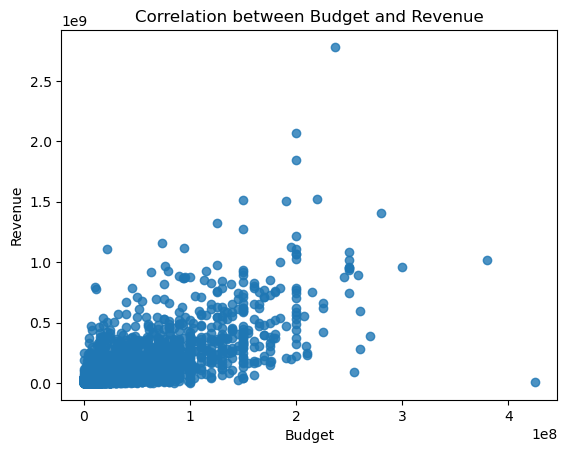

In [170]:
sb.regplot(data=df_clean, x='budget', y= 'revenue', fit_reg = False)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Correlation between Budget and Revenue');

### Question 2

- Which director produces the highest movies?

In [171]:
#sb.countplot(data = df_clean, x = 'director')
df_movie_by_director= df_clean['director'].value_counts().reset_index().head(10)
display(df_movie_by_director)

,index,director
0,Woody Allen,38
1,Clint Eastwood,30
2,Steven Spielberg,28
3,Ridley Scott,22
4,Martin Scorsese,22
5,Joel Schumacher,21
6,Brian De Palma,18
7,Ron Howard,18
8,Tim Burton,17
9,Steven Soderbergh,17


## Question 3

- Which year produced movies with highest grossing revenue?

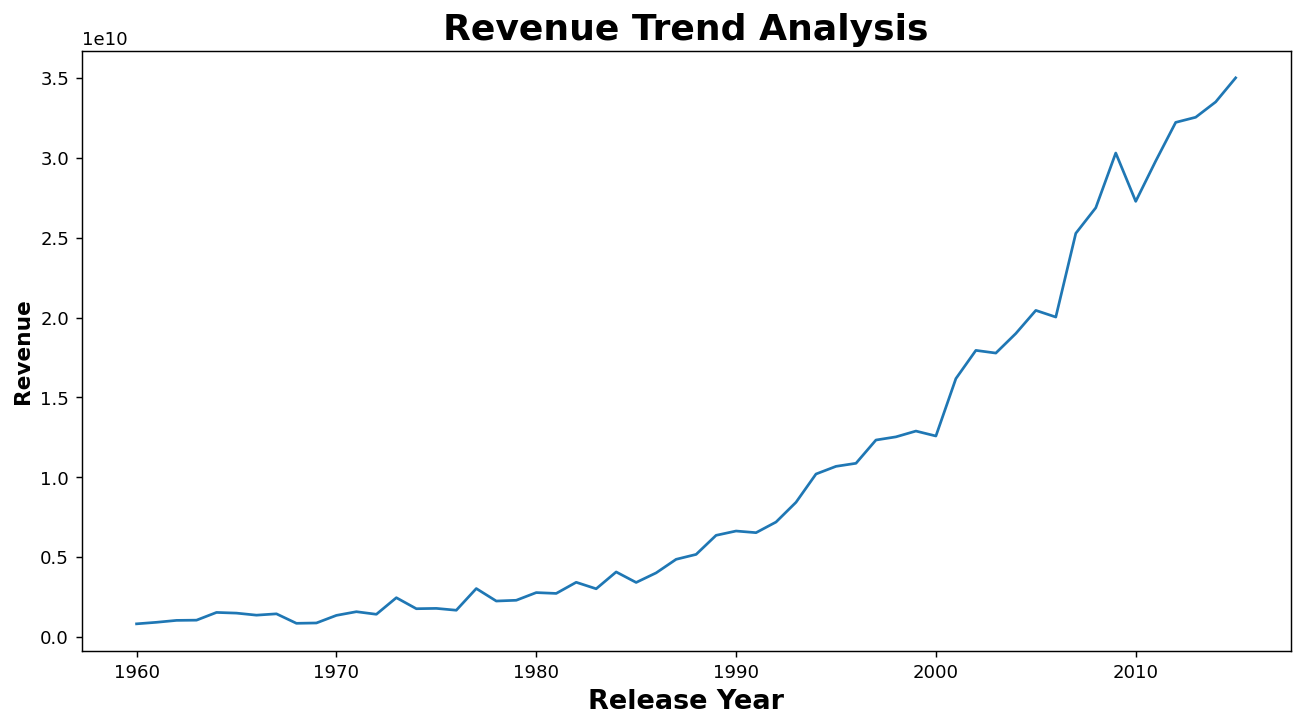

In [172]:
#We will be using Line plot for this analysis
#Since we want to know the revenues of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df_clean.groupby('release_year')['revenue'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year', fontsize = 15, weight = 'bold')
#on y-axis
plt.ylabel('Revenue', fontsize = 12, weight = 'bold')
#title of the line plot
plt.title('Revenue Trend Analysis', fontsize = 20, weight = 'bold')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

## Question 4
- How genres generated profit and revenue

In [173]:
# Calculate the profit for each movie
df_clean['profit'] = df_clean['revenue'] - df_clean['budget']
#directors_df.groupby('director')[['revenue','profit']].mean().sort_values('revenue', ascending=False).head(5)

In [174]:
profit_by_genres = df_clean.groupby('primary_genres')[['profit']].mean().sort_values('profit', ascending=False)
profit_by_genres

,profit
primary_genres,
Adventure,9.771201e+07
Science Fiction,8.057231e+07
Animation,7.463619e+07
Family,6.476236e+07
Fantasy,5.752586e+07
Action,4.990607e+07
War,4.180624e+07
Romance,4.127430e+07
History,3.676081e+07


In [175]:
revenue_by_genres = df_clean.groupby('primary_genres')[['revenue']].mean().sort_values('revenue', ascending=False)
revenue_by_genres

,revenue
primary_genres,
Adventure,1.439322e+08
Science Fiction,1.145562e+08
Animation,1.078626e+08
Family,9.439982e+07
Fantasy,8.823004e+07
Action,8.080656e+07
War,7.356670e+07
Romance,6.069009e+07
Western,6.025294e+07


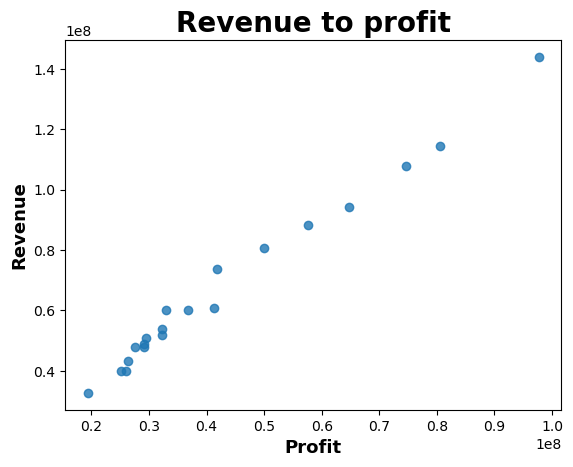

In [176]:
#The code below shows how the revenue faired against the profit
sb.regplot(x = profit_by_genres, y = revenue_by_genres, fit_reg = False)
plt.title("Revenue to profit",fontsize=20, weight = 'bold')
plt.xlabel('Profit',fontsize=13, weight = 'bold')
plt.ylabel("Revenue",fontsize= 13, weight = 'bold');

## Question 5

- Which genres has high popularity by number of release?

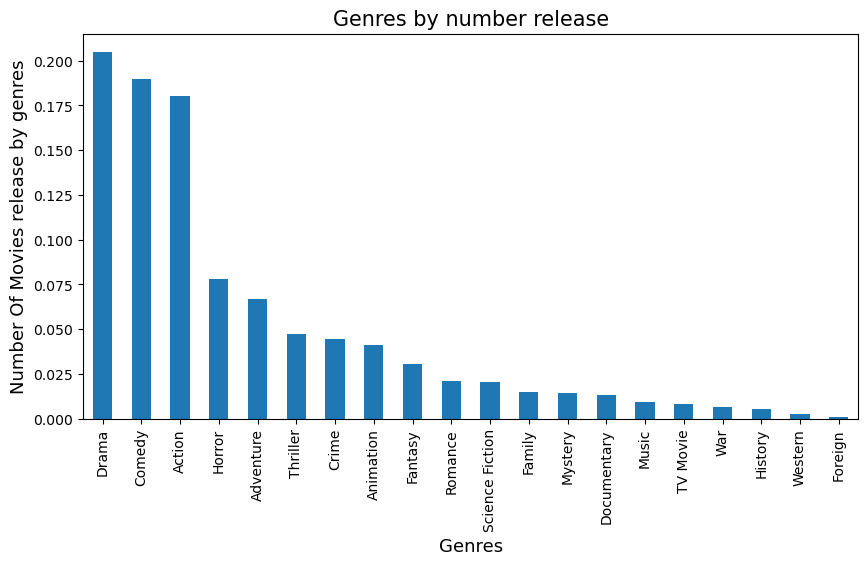

In [177]:
df_clean['primary_genres'].value_counts('popularity').plot(kind = 'bar', figsize = (10,5));

plt.title("Genres by number release",fontsize=15)
plt.xlabel('Genres',fontsize=13)
plt.ylabel("Number Of Movies release by genres",fontsize= 13);

## Question 6
- Correlation between Budget and popularity


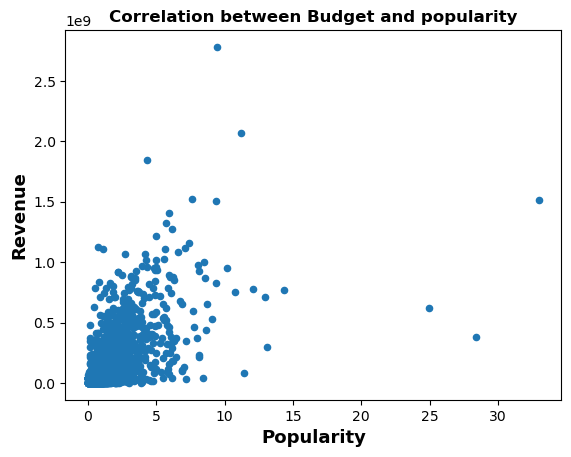

In [186]:
#The code below compare how revenue generated by the movie to it's popularity
df_clean.plot.scatter(x = 'popularity', y = 'revenue')
plt.title("Correlation between Budget and popularity",fontsize=12, weight = 'bold')
plt.xlabel('Popularity',fontsize=13, weight = 'bold')
plt.ylabel("Revenue",fontsize= 13, weight = 'bold');

# Conclusions

> After concluding the analysis, we came out with the following findings

**QUESTION 1** How budget affect revenue?
1. From the chart we could largely see that a low budget translate to low revenue, but intrestingly the Budget that generated the highest revenue is not the highest bugdget, while the highest Budget generated a significantly low revenues, there by generating a loss.

**QUESTION 2** The director produces the highest movies?

2. The director that has the produced the highest movies is **TWoody Allen with 38 movies**, followed by **Clint Eastwood with 30 movies**, **then Steven Spielberg with 28 movies**.

**QUESTION 3** Revenue Trend analysis by Year?

3. Largly there ia an upward trajectory in the revenue generated over the years, with 2015 being the year the highest revenue was generated.

**QUESTION 4** How genres affected profit and revenue?

4. Genres with high revenues positively affected the profit, the higher the revenue the higher the profit generated.

**QUESTION 5** Which genres has highest acceptance by number of release?

5. The Drama genre has the highest number of release, followed by the Comedy genre then Action genre. What this is telling is that the film maker only focused on the preference of their audience. the Adventure genre that generated the highest revenue is at distant 5th

**QUESTION 6** Correlation between Budget and popularity?

6. The most popular movie did not generate the highest revenue, so it can be infered that high popuarity is not equal to high revenue.

# Limitation

1. At the data cleaning stage, I splited genres column that contains several values separated by '|' . I keep the first value. 

2. There is no column for profit, I get the profit of each movie by deducting the budget from revenue